Rank 0 (Nodes):
[{0}, {1}, {2}, {3}, {4}]

Rank 1 (Edges):
[{0, 1}, {1, 4}, {2, 3}, {2, 4}, {3, 4}]

Rank 2 (Triplets):
[{1, 3, 4}, {2, 3, 4}]

[INFO] Top synergistic triplets:
  Triplet (0, 3, 4): S-Info = 0.3034, O-Info = -0.0106
  Triplet (2, 3, 4): S-Info = 0.2853, O-Info = 0.0082
  Triplet (1, 3, 4): S-Info = 0.2320, O-Info = -0.0000
  Triplet (0, 1, 2): S-Info = 0.1706, O-Info = 0.0034
  Triplet (1, 2, 3): S-Info = 0.1542, O-Info = -0.0017


/var/folders/sj/dyjmpqjs5c1gw2y9q6szyyfw0000gp/T/ipykernel_40093/323313972.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("plasma")


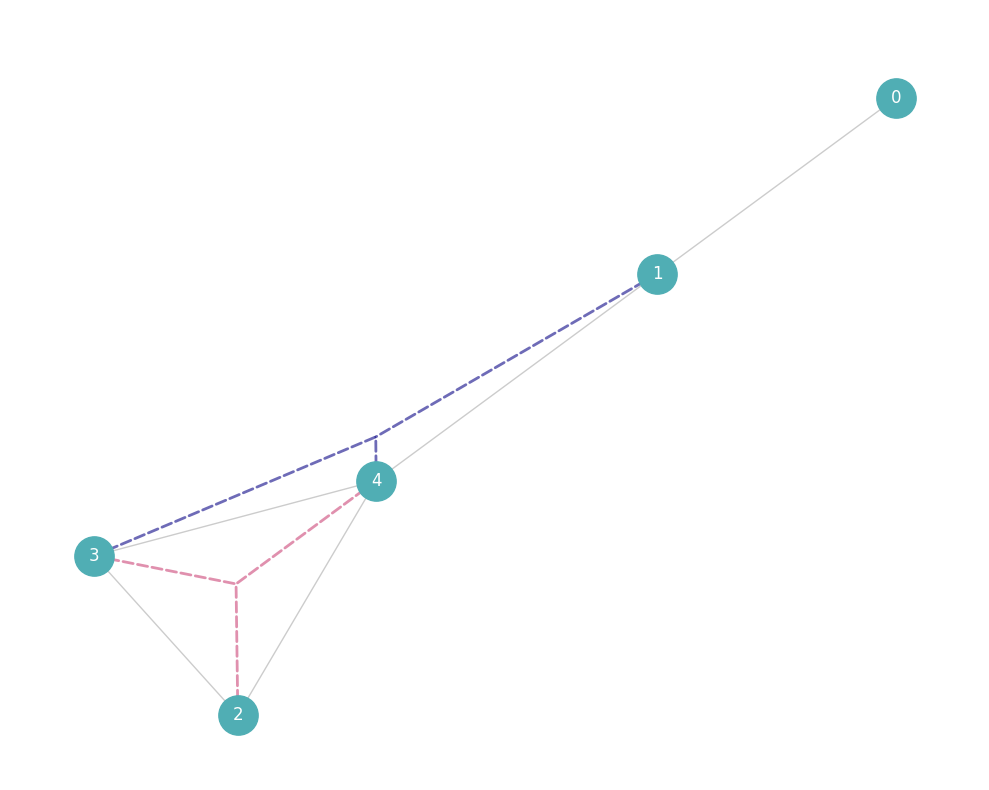

In [9]:
# notebooks/visualize_subject_cc.ipynb

# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import patches
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# --- Paths ---
# Get project root based on current working directory
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define subject and paths
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load CC + Metrics ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Display Rank Structure ---
rank_0 = [{n} for n in cc_data["nodes"]]
rank_1 = [set(e) for e in cc_data["edges"]]
rank_2 = [set(t) for t in cc_data["triplets"]]

print("Rank 0 (Nodes):")
print(rank_0)
print("\nRank 1 (Edges):")
print(rank_1)
print("\nRank 2 (Triplets):")
print(rank_2)

# --- Print Top-k Triplets by S-Info ---
top_k = 5
ranked_triplets = sorted(triplet_metrics.items(), key=lambda x: x[1]["sinfo"], reverse=True)
top_triplets = ranked_triplets[:top_k]

print("\n[INFO] Top synergistic triplets:")
for t, v in top_triplets:
    print(f"  Triplet {t}: S-Info = {v['sinfo']:.4f}, O-Info = {v['oinfo']:.4f}")

# --- Visualization: Hypergraph View ---
G = nx.Graph()
G.add_nodes_from(cc_data["nodes"])
G.add_edges_from(cc_data["edges"])

pos = nx.spring_layout(G, seed=42)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor("black")

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, ax=ax, node_color="#50aeb4", node_size=800)
nx.draw_networkx_labels(G, pos, ax=ax, font_color="white", font_size=12)
nx.draw_networkx_edges(G, pos, ax=ax, edge_color="gray", style="solid", alpha=0.4)

# Draw hyperedges (as arcs from node to triplet centroid)
cmap = get_cmap("plasma")
norm = Normalize(vmin=0, vmax=len(rank_2))

for idx, triplet in enumerate(rank_2):
    pts = np.array([pos[n] for n in triplet])
    centroid = np.mean(pts, axis=0)
    for node in triplet:
        x0, y0 = pos[node]
        x1, y1 = centroid
        arc = patches.ConnectionPatch(
            (x0, y0), (x1, y1),
            "data", "data",
            arrowstyle="-",
            linestyle="--",
            color=cmap(norm(idx)),
            linewidth=2,
            alpha=0.6
        )
        ax.add_patch(arc)

# Final touches
plt.title("Combinatorial Complex Hypergraph", fontsize=14, color="white")
plt.axis("off")
plt.tight_layout()
plt.show()

/var/folders/sj/dyjmpqjs5c1gw2y9q6szyyfw0000gp/T/ipykernel_40093/3642841878.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("plasma")


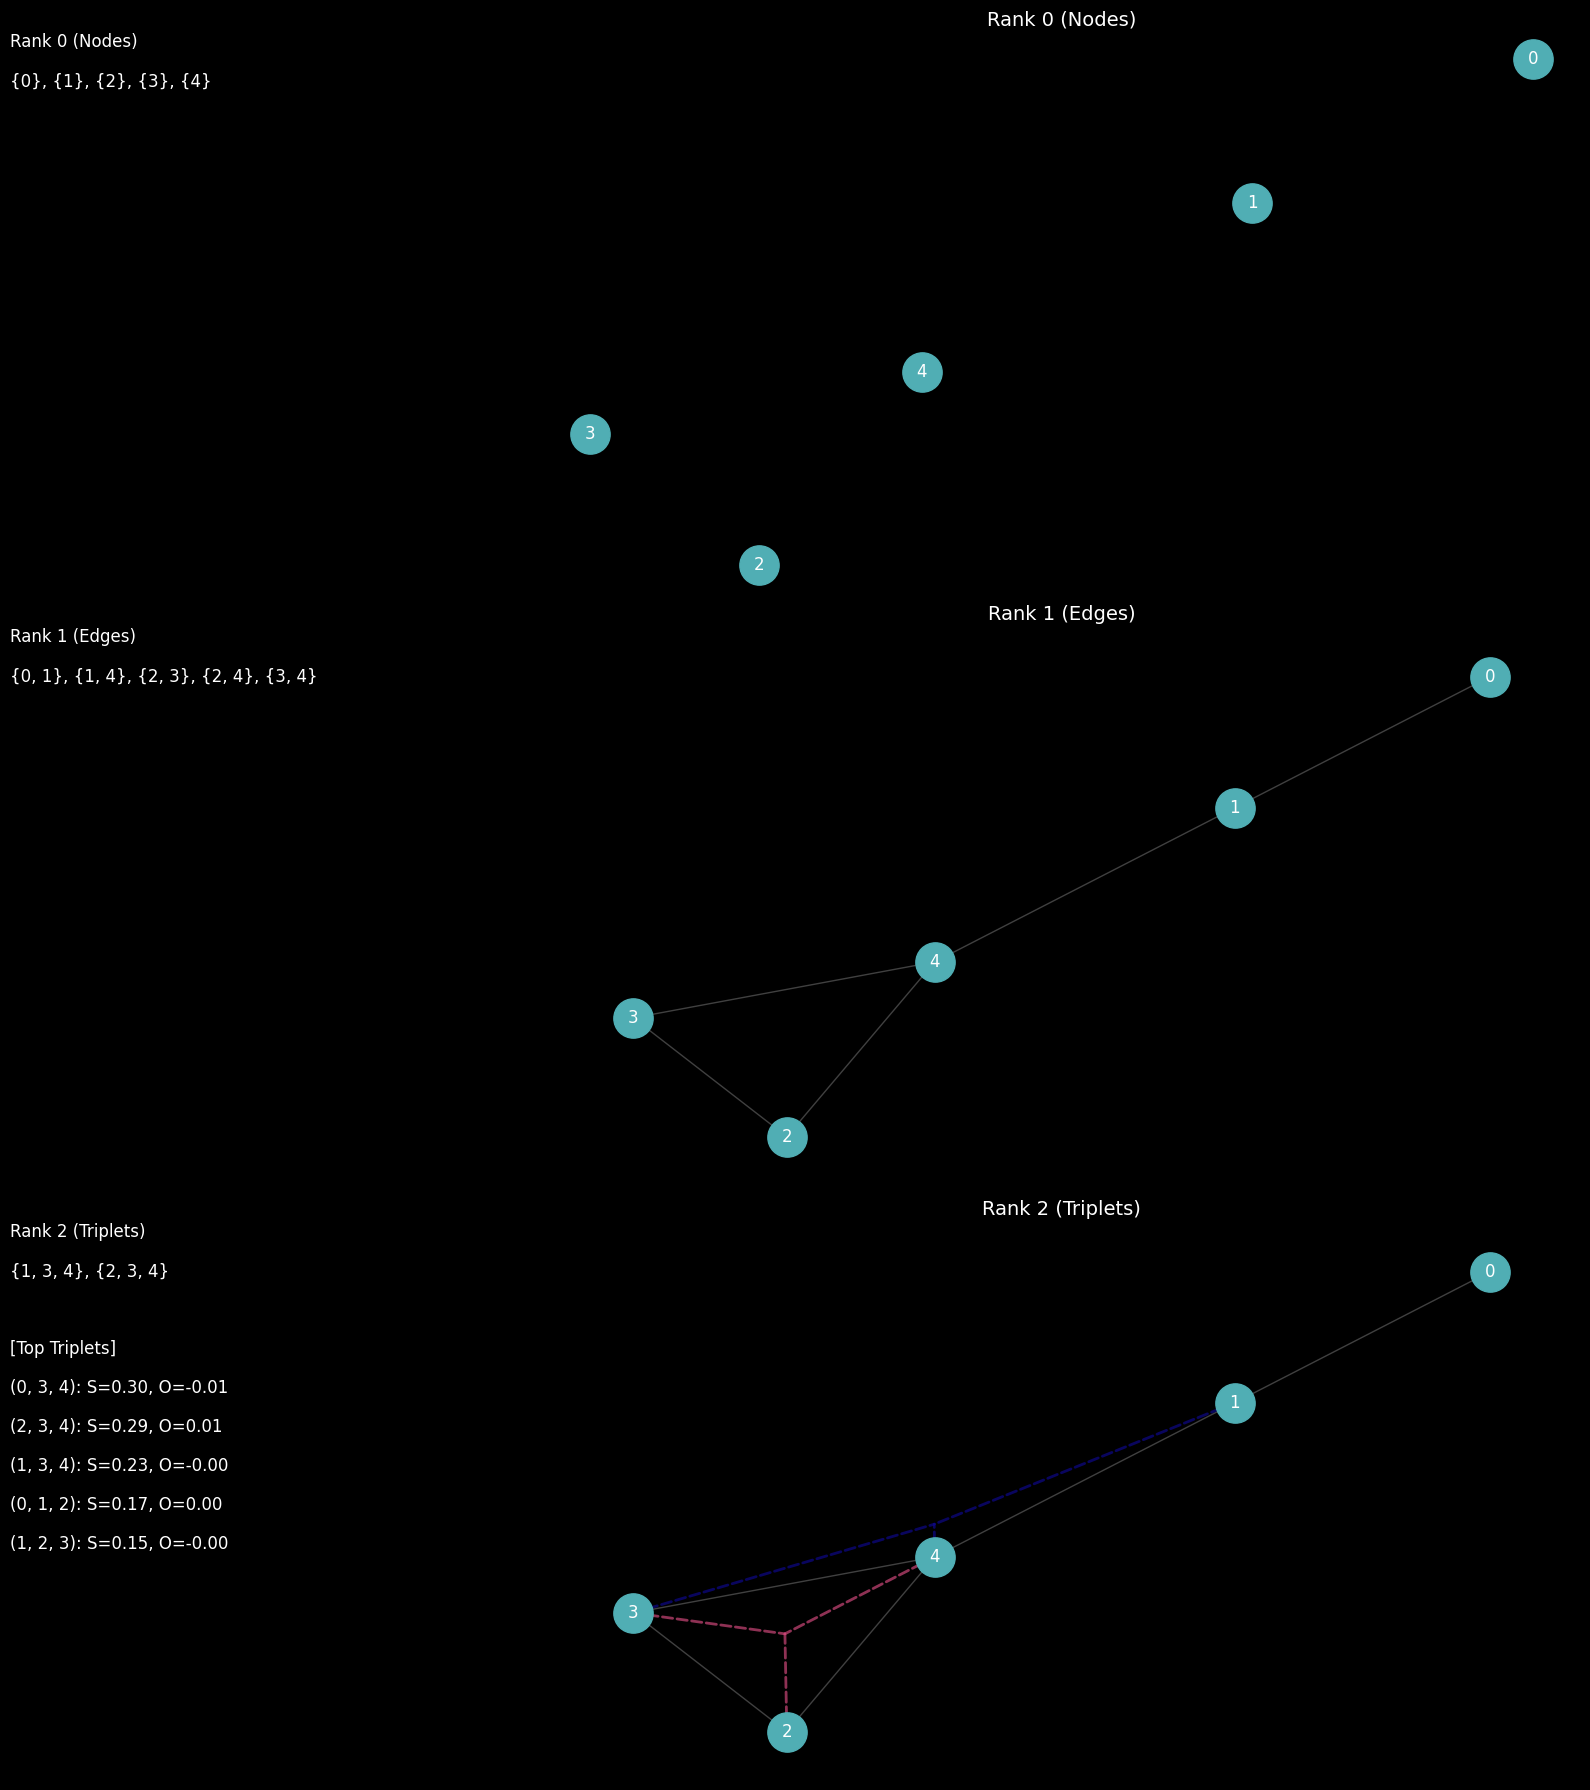

In [11]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import patches
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# --- Paths ---
# Get project root based on current working directory
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Top Triplet Summary ---
top_k = 5
ranked_triplets = sorted(triplet_metrics.items(), key=lambda x: x[1]["sinfo"], reverse=True)
top_triplets = ranked_triplets[:top_k]

# --- Graph Layout ---
G = nx.Graph()
G.add_nodes_from(rank_0)
G.add_edges_from(rank_1)
pos = nx.spring_layout(G, seed=42)

# --- Plot Setup ---
fig, axes = plt.subplots(3, 2, figsize=(16, 18), gridspec_kw={"width_ratios": [1, 2]})
fig.patch.set_facecolor("black")
cmap = get_cmap("plasma")
norm = Normalize(vmin=0, vmax=len(rank_2))

rank_labels = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets)"]

# --- Loop Through Ranks ---
for i in range(3):
    # --- Left Panel: Text Summary ---
    ax_text = axes[i, 0]
    ax_text.axis("off")
    y = 1.0

    if i == 0:
        lines = [rank_labels[i], ", ".join(str({n}) for n in rank_0)]
    elif i == 1:
        lines = [rank_labels[i], ", ".join(str(set(e)) for e in rank_1)]
    else:
        lines = [rank_labels[i], ", ".join(str(set(t)) for t in rank_2)]
        lines += ["", "[Top Triplets]"]
        lines += [f"{t}: S={v['sinfo']:.2f}, O={v['oinfo']:.2f}" for t, v in top_triplets]

    for line in lines:
        ax_text.text(0, y, line, fontsize=12, color="white", va="top")
        y -= 0.07

    # --- Right Panel: Graph View ---
    ax_graph = axes[i, 1]
    ax_graph.set_facecolor("black")

    nx.draw_networkx_nodes(G, pos, ax=ax_graph, node_color="#50aeb4", node_size=800)
    nx.draw_networkx_labels(G, pos, ax=ax_graph, font_color="white", font_size=12)

    if i >= 1:
        nx.draw_networkx_edges(G, pos, ax=ax_graph, edge_color="gray", style="solid", alpha=0.5)

    if i == 2:
        for idx, triplet in enumerate(rank_2):
            pts = np.array([pos[n] for n in triplet])
            centroid = np.mean(pts, axis=0)
            for node in triplet:
                x0, y0 = pos[node]
                x1, y1 = centroid
                arc = patches.ConnectionPatch(
                    (x0, y0), (x1, y1),
                    "data", "data",
                    arrowstyle="-",
                    linestyle="--",
                    color=cmap(norm(idx)),
                    linewidth=2,
                    alpha=0.7
                )
                ax_graph.add_patch(arc)

    ax_graph.set_title(rank_labels[i], fontsize=14, color="white")
    ax_graph.axis("off")

plt.tight_layout()
plt.show()

[INFO] Top synergistic triplets:
  Triplet (0, 3, 4): S-Info = 0.3034, O-Info = -0.0106
  Triplet (2, 3, 4): S-Info = 0.2853, O-Info = 0.0082
  Triplet (1, 3, 4): S-Info = 0.2320, O-Info = -0.0000
  Triplet (0, 1, 2): S-Info = 0.1706, O-Info = 0.0034
  Triplet (1, 2, 3): S-Info = 0.1542, O-Info = -0.0017
  Triplet (0, 1, 4): S-Info = 0.1316, O-Info = 0.0021
  Triplet (1, 2, 4): S-Info = 0.0991, O-Info = 0.0017
  Triplet (0, 1, 3): S-Info = 0.0934, O-Info = -0.0003
  Triplet (0, 2, 3): S-Info = 0.0775, O-Info = -0.0011
  Triplet (0, 2, 4): S-Info = 0.0612, O-Info = 0.0017


/var/folders/sj/dyjmpqjs5c1gw2y9q6szyyfw0000gp/T/ipykernel_40093/540185117.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("plasma")


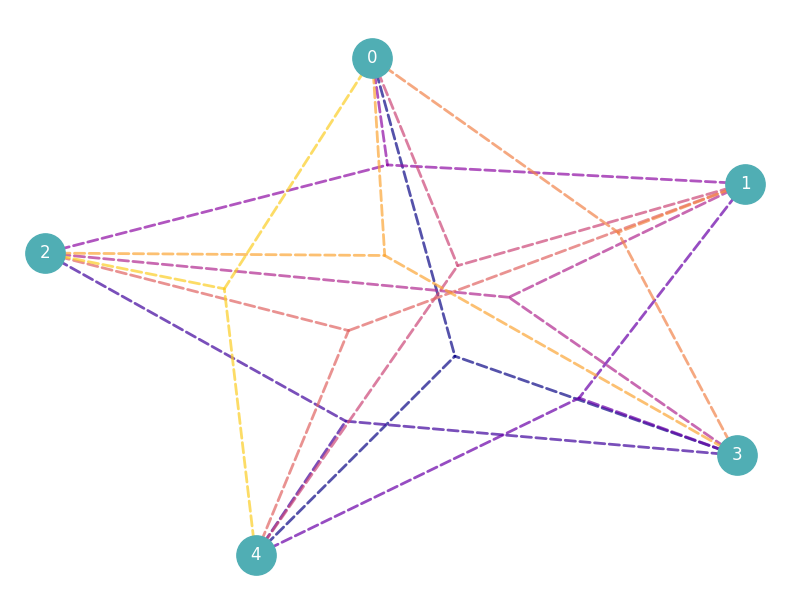

In [10]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import patches
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# --- Paths ---
# Get project root based on current working directory
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define paths relative to repo root
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")

# --- Load Triplet Metrics ---
with open(metrics_path, "r") as f:
    raw = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw.items()
}

# --- Rank & Sort Triplets by S-Info ---
top_k = 10
ranked_triplets = sorted(triplet_metrics.items(), key=lambda x: x[1]["sinfo"], reverse=True)
top_triplets = ranked_triplets[:top_k]
triplets = [t for t, _ in top_triplets]

# --- Print Info Table ---
print("[INFO] Top synergistic triplets:")
for t, v in top_triplets:
    print(f"  Triplet {t}: S-Info = {v['sinfo']:.4f}, O-Info = {v['oinfo']:.4f}")

# --- Draw Hypergraph Using Arcs Instead of Triangles ---
G = nx.Graph()
for triplet in triplets:
    G.add_nodes_from(triplet)

# Layout
pos = nx.spring_layout(G, seed=42)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor("black")

# Draw nodes
nx.draw_networkx_nodes(G, pos, ax=ax, node_color="#50aeb4", node_size=800)
nx.draw_networkx_labels(G, pos, ax=ax, font_color="white", font_size=12)

# Prepare color scale
cmap = get_cmap("plasma")
norm = Normalize(vmin=0, vmax=len(triplets))

# Draw curved hyperedges for each triplet
for idx, triplet in enumerate(triplets):
    pts = np.array([pos[n] for n in triplet])
    centroid = np.mean(pts, axis=0)

    # Draw curved arcs from each node to the centroid
    for node in triplet:
        x0, y0 = pos[node]
        x1, y1 = centroid
        rad = 0.2 + 0.1 * idx  # Vary radius for nicer spacing
        con = patches.ConnectionPatch(
            (x0, y0), (x1, y1),
            "data", "data",
            arrowstyle="-",
            linestyle="--",
            color=cmap(norm(idx)),
            linewidth=2,
            alpha=0.7
        )
        ax.add_patch(con)

# Final touches
plt.title("Hypergraph View of Top Triplets", fontsize=14, color="white")
plt.axis("off")
plt.tight_layout()
plt.show()

In [12]:
import plotly.graph_objects as go
import numpy as np

# --- Helpers ---
def layout_nodes(cc_nodes):
    n = len(cc_nodes)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    return {node: (np.cos(t), np.sin(t)) for node, t in zip(cc_nodes, theta)}

def add_node_trace(pos, node_color="lightblue"):
    x, y = zip(*[pos[n] for n in pos])
    return go.Scatter(
        x=x, y=y, mode="markers+text",
        marker=dict(size=20, color=node_color, line=dict(color="black", width=1)),
        text=list(pos.keys()), textposition="top center", hoverinfo="text"
    )

def add_edge_trace(pos, edges, color="gray"):
    edge_x, edge_y = [], []
    for i, j in edges:
        x0, y0 = pos[i]
        x1, y1 = pos[j]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]
    return go.Scatter(x=edge_x, y=edge_y, mode="lines", line=dict(width=2, color=color), hoverinfo="none")

def add_hyperedge_trace(pos, triplets, colorscale="Viridis"):
    triplet_traces = []
    for i, triplet in enumerate(triplets):
        pts = np.array([pos[n] for n in triplet])
        cx, cy = pts.mean(axis=0)
        for n in triplet:
            x0, y0 = pos[n]
            triplet_traces.append(
                go.Scatter(
                    x=[x0, cx], y=[y0, cy],
                    mode="lines",
                    line=dict(color=f"rgba({50+20*i%255},{150+i*10%255},{200-i*5%255},0.6)", width=2, dash="dot"),
                    hoverinfo="none"
                )
            )
    return triplet_traces

# --- Load Pos + Layers ---
pos = layout_nodes(cc_data["nodes"])
edges = [tuple(e) for e in cc_data["edges"]]
triplets = [tuple(t) for t in cc_data["triplets"]]

# --- Layered Figures ---
figs = []

# Rank 0 (nodes)
fig0 = go.Figure()
fig0.add_trace(add_node_trace(pos))
fig0.update_layout(title="Rank 0 – Nodes Only", plot_bgcolor="white", showlegend=False)
figs.append(fig0)

# Rank 1 (graph)
fig1 = go.Figure()
fig1.add_trace(add_edge_trace(pos, edges))
fig1.add_trace(add_node_trace(pos))
fig1.update_layout(title="Rank 1 – Graph View (Edges)", plot_bgcolor="white", showlegend=False)
figs.append(fig1)

# Rank 2 (hypergraph)
fig2 = go.Figure()
for trace in add_hyperedge_trace(pos, triplets):
    fig2.add_trace(trace)
fig2.add_trace(add_edge_trace(pos, edges))
fig2.add_trace(add_node_trace(pos))
fig2.update_layout(title="Rank 2 – Hypergraph with Triplets", plot_bgcolor="white", showlegend=False)
figs.append(fig2)

# --- Show All ---
for f in figs:
    f.show()

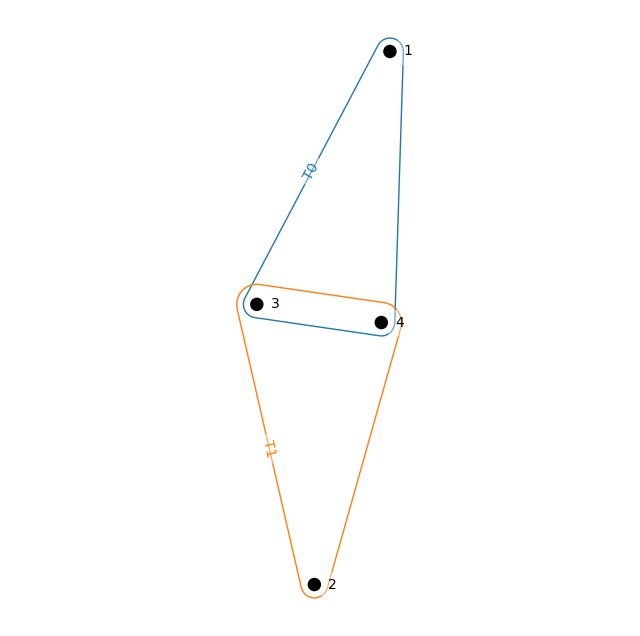

In [13]:
import hypernetx as hnx

# Convert triplets into hypergraph format
triplet_hyperedges = {f"T{i}": set(t) for i, t in enumerate(cc_data["triplets"])}

# Create HNX hypergraph
H = hnx.Hypergraph(triplet_hyperedges)

# Plot with default style
hnx.drawing.draw(H, with_node_labels=True)

In [15]:
import plotly.graph_objects as go
import numpy as np

# --- Helpers ---
def layout_nodes(cc_nodes):
    n = len(cc_nodes)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    return {node: (np.cos(t), np.sin(t)) for node, t in zip(cc_nodes, theta)}

def add_node_trace(pos, node_color="lightblue"):
    x, y = zip(*[pos[n] for n in pos])
    return go.Scatter(
        x=x, y=y, mode="markers+text",
        marker=dict(size=20, color=node_color, line=dict(color="black", width=1)),
        text=list(pos.keys()), textposition="top center", hoverinfo="text"
    )

def add_edge_trace(pos, edges, color="gray"):
    edge_x, edge_y = [], []
    for i, j in edges:
        x0, y0 = pos[i]
        x1, y1 = pos[j]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]
    return go.Scatter(x=edge_x, y=edge_y, mode="lines", line=dict(width=2, color=color), hoverinfo="none")

def add_hyperedge_trace(pos, triplets, colorscale="Viridis"):
    triplet_traces = []
    for i, triplet in enumerate(triplets):
        pts = np.array([pos[n] for n in triplet])
        cx, cy = pts.mean(axis=0)
        for n in triplet:
            x0, y0 = pos[n]
            triplet_traces.append(
                go.Scatter(
                    x=[x0, cx], y=[y0, cy],
                    mode="lines",
                    line=dict(color=f"rgba({50+20*i%255},{150+i*10%255},{200-i*5%255},0.6)", width=2, dash="dot"),
                    hoverinfo="none"
                )
            )
    return triplet_traces

# --- Load Pos + Layers ---
pos = layout_nodes(cc_data["nodes"])
edges = [tuple(e) for e in cc_data["edges"]]
triplets = [tuple(t) for t in cc_data["triplets"]]

# --- Layered Figures ---
figs = []

# Rank 0 (nodes)
fig0 = go.Figure()
fig0.add_trace(add_node_trace(pos))
fig0.update_layout(title="Rank 0 – Nodes Only", plot_bgcolor="white", showlegend=False)
figs.append(fig0)

# Rank 1 (graph)
fig1 = go.Figure()
fig1.add_trace(add_edge_trace(pos, edges))
fig1.add_trace(add_node_trace(pos))
fig1.update_layout(title="Rank 1 – Graph View (Edges)", plot_bgcolor="white", showlegend=False)
figs.append(fig1)

# Rank 2 (hypergraph)
fig2 = go.Figure()
for trace in add_hyperedge_trace(pos, triplets):
    fig2.add_trace(trace)
fig2.add_trace(add_edge_trace(pos, edges))
fig2.add_trace(add_node_trace(pos))
fig2.update_layout(title="Rank 2 – Hypergraph with Triplets", plot_bgcolor="white", showlegend=False)
figs.append(fig2)

# --- Show All ---
for f in figs:
    f.show()

In [16]:
import plotly.graph_objects as go
import numpy as np

# --- Helpers ---
def layout_nodes(cc_nodes):
    n = len(cc_nodes)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    return {node: (np.cos(t), np.sin(t)) for node, t in zip(cc_nodes, theta)}

def add_node_trace(pos, node_color="lightblue"):
    x, y = zip(*[pos[n] for n in pos])
    return go.Scatter(
        x=x, y=y, mode="markers+text",
        marker=dict(size=20, color=node_color, line=dict(color="black", width=1)),
        text=list(pos.keys()), textposition="top center", hoverinfo="text"
    )

def add_edge_trace(pos, edges, color="gray"):
    edge_x, edge_y = [], []
    for i, j in edges:
        x0, y0 = pos[i]
        x1, y1 = pos[j]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]
    return go.Scatter(x=edge_x, y=edge_y, mode="lines", line=dict(width=2, color=color), hoverinfo="none")

def add_hyperedge_trace(pos, triplets, colorscale="Viridis"):
    triplet_traces = []
    for i, triplet in enumerate(triplets):
        pts = np.array([pos[n] for n in triplet])
        cx, cy = pts.mean(axis=0)
        for n in triplet:
            x0, y0 = pos[n]
            triplet_traces.append(
                go.Scatter(
                    x=[x0, cx], y=[y0, cy],
                    mode="lines",
                    line=dict(color=f"rgba({50+20*i%255},{150+i*10%255},{200-i*5%255},0.6)", width=2, dash="dot"),
                    hoverinfo="none"
                )
            )
    return triplet_traces

# --- Load Pos + Layers ---
pos = layout_nodes(cc_data["nodes"])
edges = [tuple(e) for e in cc_data["edges"]]
triplets = [tuple(t) for t in cc_data["triplets"]]

# --- Layered Figures ---
figs = []

# Rank 0 (nodes)
fig0 = go.Figure()
fig0.add_trace(add_node_trace(pos))
fig0.update_layout(title="Rank 0 – Nodes Only", plot_bgcolor="white", showlegend=False)
figs.append(fig0)

# Rank 1 (graph)
fig1 = go.Figure()
fig1.add_trace(add_edge_trace(pos, edges))
fig1.add_trace(add_node_trace(pos))
fig1.update_layout(title="Rank 1 – Graph View (Edges)", plot_bgcolor="white", showlegend=False)
figs.append(fig1)

# Rank 2 (hypergraph)
fig2 = go.Figure()
for trace in add_hyperedge_trace(pos, triplets):
    fig2.add_trace(trace)
fig2.add_trace(add_edge_trace(pos, edges))
fig2.add_trace(add_node_trace(pos))
fig2.update_layout(title="Rank 2 – Hypergraph with Triplets", plot_bgcolor="white", showlegend=False)
figs.append(fig2)

# --- Show All ---
for f in figs:
    f.show()

/var/folders/sj/dyjmpqjs5c1gw2y9q6szyyfw0000gp/T/ipykernel_40093/2983276839.py:48: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



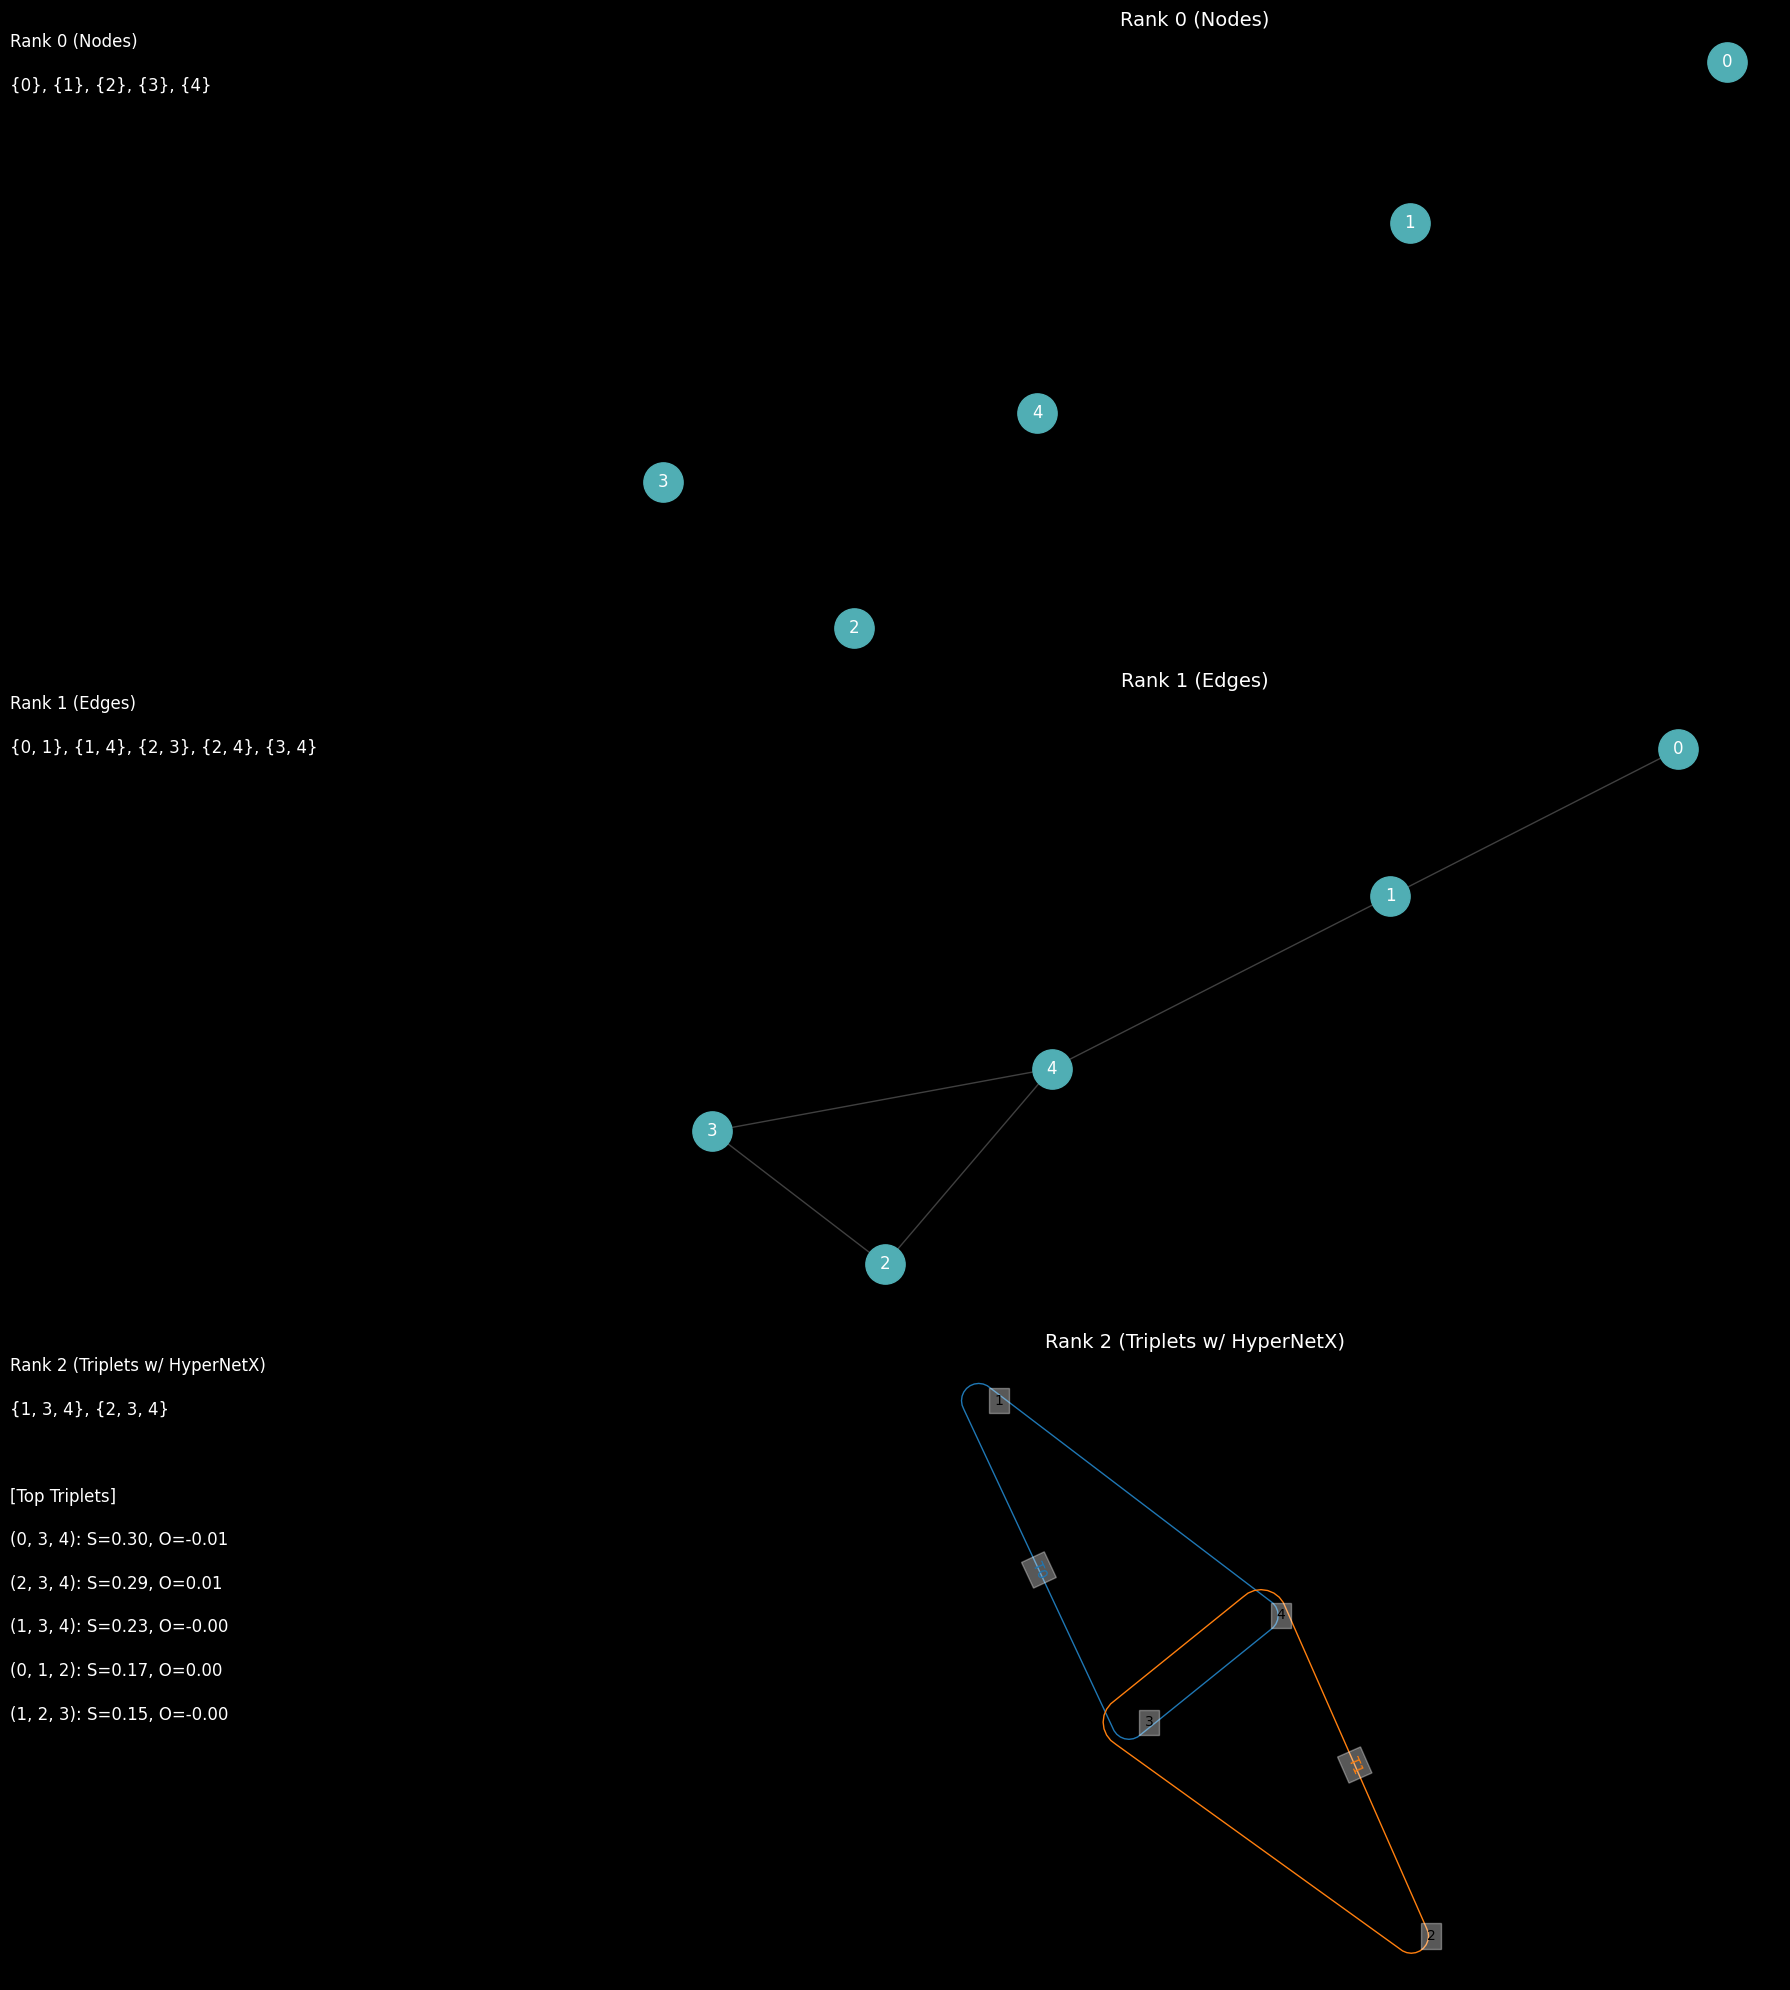

In [18]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
import hypernetx as hnx

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Top Triplet Summary ---
top_k = 5
ranked_triplets = sorted(triplet_metrics.items(), key=lambda x: x[1]["sinfo"], reverse=True)
top_triplets = ranked_triplets[:top_k]

# --- Graph Layout ---
G = nx.Graph()
G.add_nodes_from(rank_0)
G.add_edges_from(rank_1)
pos = nx.spring_layout(G, seed=42)

# --- Plot Setup ---
fig, axes = plt.subplots(3, 2, figsize=(18, 20), gridspec_kw={"width_ratios": [1, 2]})
fig.patch.set_facecolor("black")
cmap = get_cmap("plasma")
norm = Normalize(vmin=0, vmax=len(rank_2))

rank_labels = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets w/ HyperNetX)"]

# --- Loop Through Ranks ---
for i in range(3):
    # --- Left Panel: Text Summary ---
    ax_text = axes[i, 0]
    ax_text.axis("off")
    y = 1.0

    if i == 0:
        lines = [rank_labels[i], ", ".join(str({n}) for n in rank_0)]
    elif i == 1:
        lines = [rank_labels[i], ", ".join(str(set(e)) for e in rank_1)]
    else:
        lines = [rank_labels[i], ", ".join(str(set(t)) for t in rank_2)]
        lines += ["", "[Top Triplets]"]
        lines += [f"{t}: S={v['sinfo']:.2f}, O={v['oinfo']:.2f}" for t, v in top_triplets]

    for line in lines:
        ax_text.text(0, y, line, fontsize=12, color="white", va="top")
        y -= 0.07

    # --- Right Panel: Graph View ---
    ax_graph = axes[i, 1]
    ax_graph.set_facecolor("black")

    if i < 2:
        nx.draw_networkx_nodes(G, pos, ax=ax_graph, node_color="#50aeb4", node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax_graph, font_color="white", font_size=12)
        if i == 1:
            nx.draw_networkx_edges(G, pos, ax=ax_graph, edge_color="gray", style="solid", alpha=0.5)
    else:
        H_data = {f"T{idx}": set(t) for idx, t in enumerate(rank_2)}
        H = hnx.Hypergraph(H_data)
        hnx.drawing.draw(H, with_node_labels=True, ax=ax_graph)

    ax_graph.set_title(rank_labels[i], fontsize=14, color="white")
    ax_graph.axis("off")

plt.tight_layout()
plt.show()

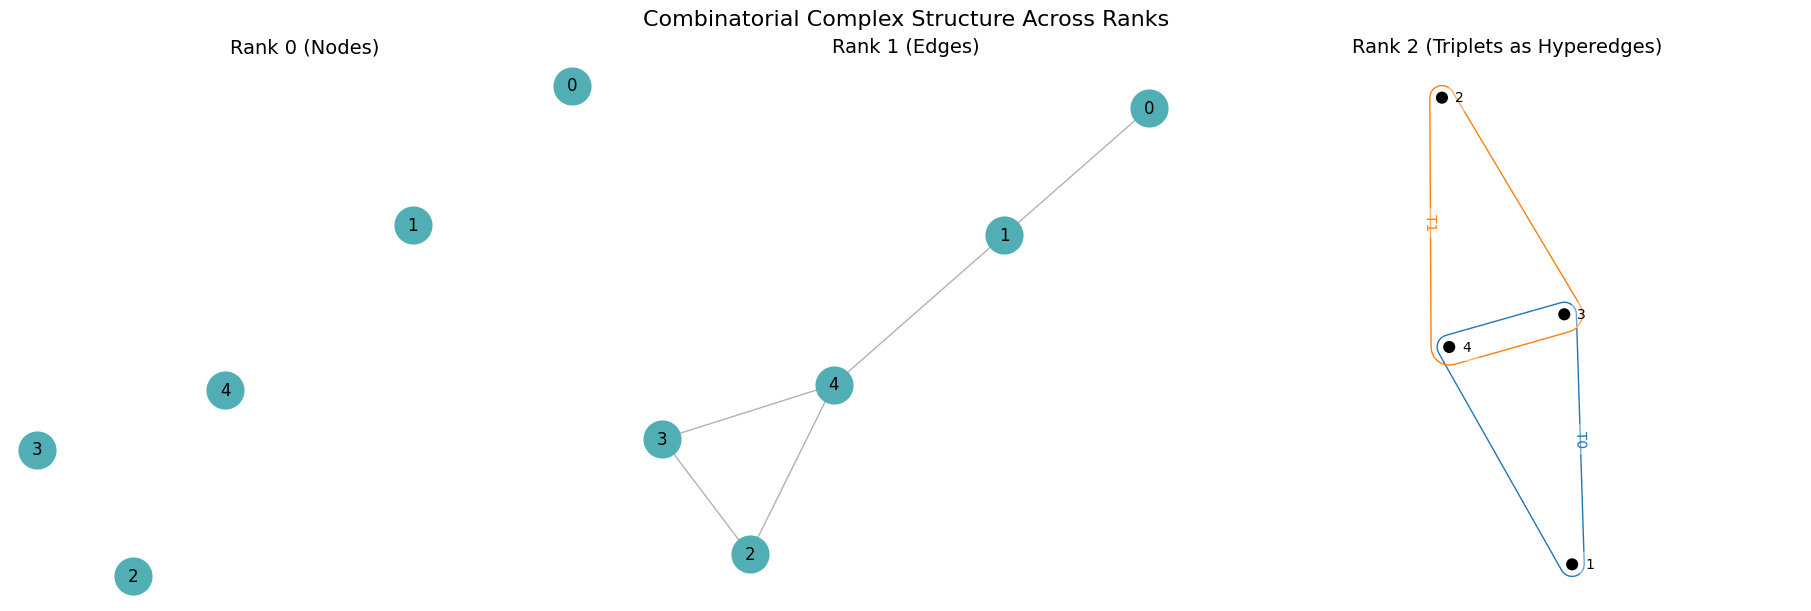

In [20]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import matplotlib as mpl

# Set global font to serif (like Times New Roman or LaTeX default)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']  # or use ['Computer Modern'] if installed
mpl.rcParams['text.color'] = 'black'

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Graph Layout ---
G = nx.Graph()
G.add_nodes_from(rank_0)
G.add_edges_from(rank_1)
pos = nx.spring_layout(G, seed=42)

# --- Figure ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets as Hyperedges)"]

# Rank 0
nx.draw_networkx_nodes(G, pos, ax=axes[0], node_color="#50aeb4", node_size=700)
nx.draw_networkx_labels(G, pos, ax=axes[0], font_color="black", font_size=12)
axes[0].set_title(titles[0], fontsize=14)
axes[0].axis("off")

# Rank 1
nx.draw_networkx_nodes(G, pos, ax=axes[1], node_color="#50aeb4", node_size=700)
nx.draw_networkx_edges(G, pos, ax=axes[1], edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(G, pos, ax=axes[1], font_color="black", font_size=12)
axes[1].set_title(titles[1], fontsize=14)
axes[1].axis("off")

# Rank 2 (HyperNetX)
H_data = {f"T{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(H, with_node_labels=True, ax=axes[2])
axes[2].set_title(titles[2], fontsize=14)
axes[2].axis("off")

plt.suptitle("Combinatorial Complex Structure Across Ranks", fontsize=16)
plt.show()

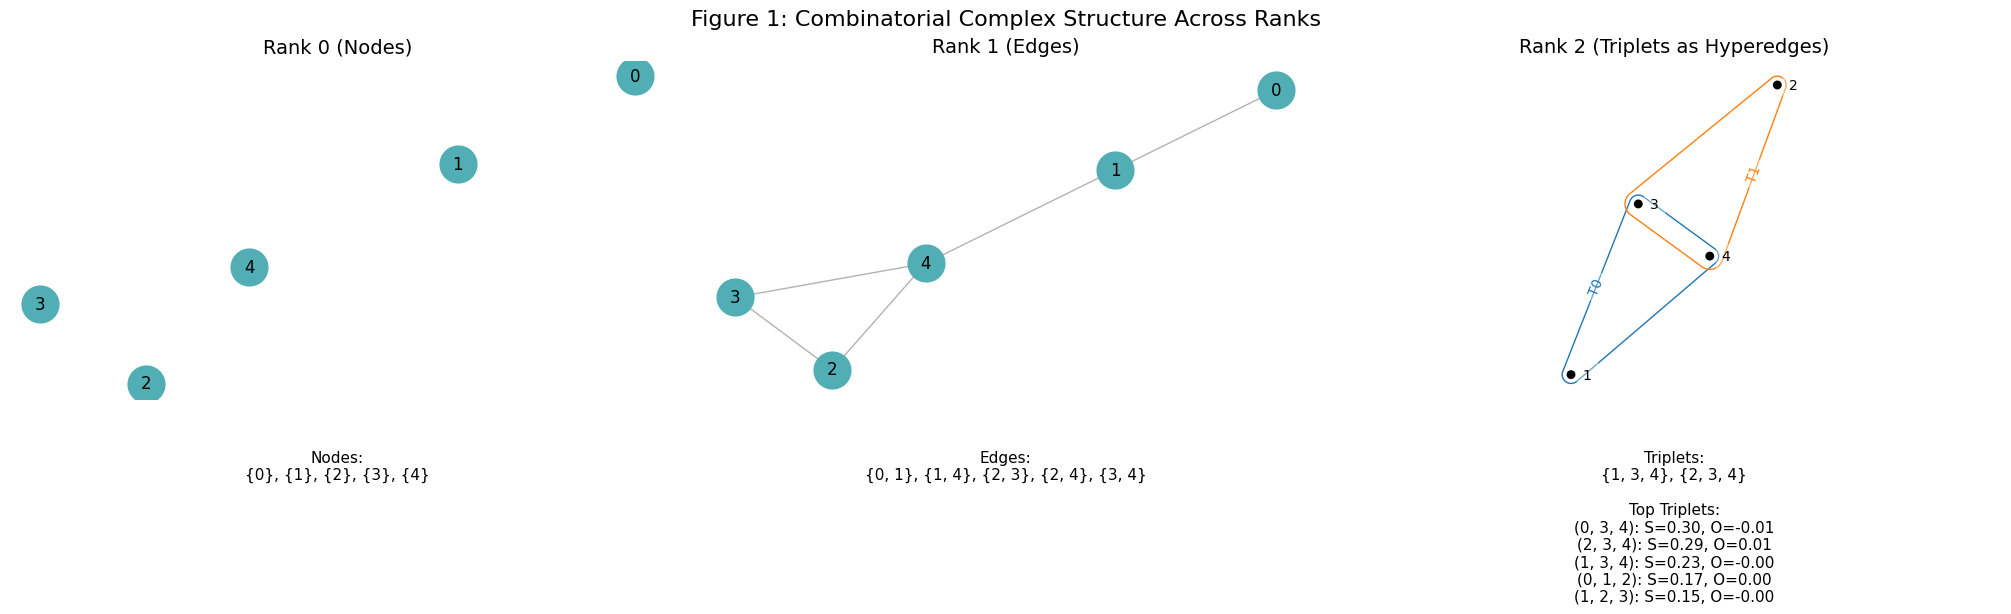

In [23]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Top Triplet Summary ---
top_k = 5
ranked_triplets = sorted(triplet_metrics.items(), key=lambda x: x[1]["sinfo"], reverse=True)
top_triplets = ranked_triplets[:top_k]

# --- Graph Layout ---
G = nx.Graph()
G.add_nodes_from(rank_0)
G.add_edges_from(rank_1)
pos = nx.spring_layout(G, seed=42)

# --- Plot Setup ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets as Hyperedges)"]
annotations = []

# --- Rank 0 ---
nx.draw_networkx_nodes(G, pos, ax=axes[0], node_color="#50aeb4", node_size=700)
nx.draw_networkx_labels(G, pos, ax=axes[0], font_color="black", font_size=12)
axes[0].set_title(titles[0], fontsize=14)
axes[0].axis("off")
annotations.append(f"Nodes:\n" + ", ".join(f"{{{n}}}" for n in rank_0))

# --- Rank 1 ---
nx.draw_networkx_nodes(G, pos, ax=axes[1], node_color="#50aeb4", node_size=700)
nx.draw_networkx_edges(G, pos, ax=axes[1], edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(G, pos, ax=axes[1], font_color="black", font_size=12)
axes[1].set_title(titles[1], fontsize=14)
axes[1].axis("off")
annotations.append(f"Edges:\n" + ", ".join(str(set(e)) for e in rank_1))

# --- Rank 2 ---
H_data = {f"T{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(H, with_node_labels=True, ax=axes[2])
axes[2].set_title(titles[2], fontsize=14)
axes[2].axis("off")

triplet_lines = [f"{t}: S={v['sinfo']:.2f}, O={v['oinfo']:.2f}" for t, v in top_triplets]
annotations.append("Triplets:\n" + ", ".join(str(set(t)) for t in rank_2) + "\n\nTop Triplets:\n" + "\n".join(triplet_lines))

# --- Add Annotations Below Each Plot ---
for ax, text in zip(axes, annotations):
    ax.text(0.5, -0.15, text, fontsize=11, color="black", ha="center", va="top", transform=ax.transAxes)

# --- Super Title ---
plt.suptitle("Figure 1: Combinatorial Complex Structure Across Ranks", fontsize=16, color="black")
plt.show()

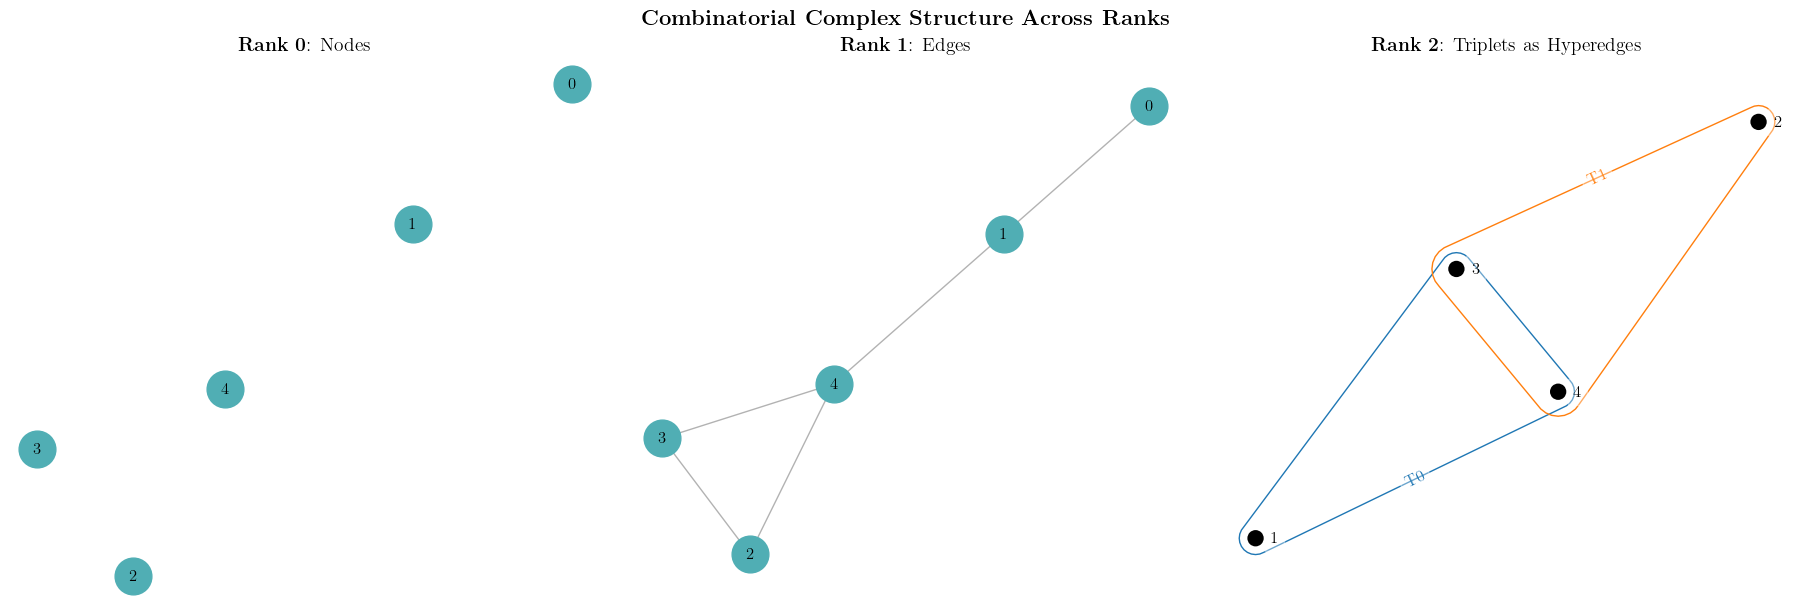

In [31]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import matplotlib as mpl

# 🔧 Ensure latex path is visible to matplotlib subprocesses
os.environ['PATH'] += os.pathsep + '/Library/TeX/texbin'

# Set global font to serif with LaTeX
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['text.usetex'] = True  # <- triggers LaTeX rendering
mpl.rcParams['text.color'] = 'black'

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Graph Layout ---
G = nx.Graph()
G.add_nodes_from(rank_0)
G.add_edges_from(rank_1)
pos = nx.spring_layout(G, seed=42)

# --- Figure ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = [
    r"\textbf{Rank 0}: Nodes",
    r"\textbf{Rank 1}: Edges",
    r"\textbf{Rank 2}: Triplets as Hyperedges"
]

# Rank 0
nx.draw_networkx_nodes(G, pos, ax=axes[0], node_color="#50aeb4", node_size=700)
nx.draw_networkx_labels(G, pos, ax=axes[0], font_color="black", font_size=12)
axes[0].set_title(titles[0])
axes[0].axis("off")

# Rank 1
nx.draw_networkx_nodes(G, pos, ax=axes[1], node_color="#50aeb4", node_size=700)
nx.draw_networkx_edges(G, pos, ax=axes[1], edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(G, pos, ax=axes[1], font_color="black", font_size=12)
axes[1].set_title(titles[1])
axes[1].axis("off")

# Rank 2 (HyperNetX)
H_data = {f"T{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(H, with_node_labels=True, ax=axes[2])
axes[2].set_title(titles[2])
axes[2].axis("off")

plt.suptitle(r"\textbf{Combinatorial Complex Structure Across Ranks}", fontsize=16)
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

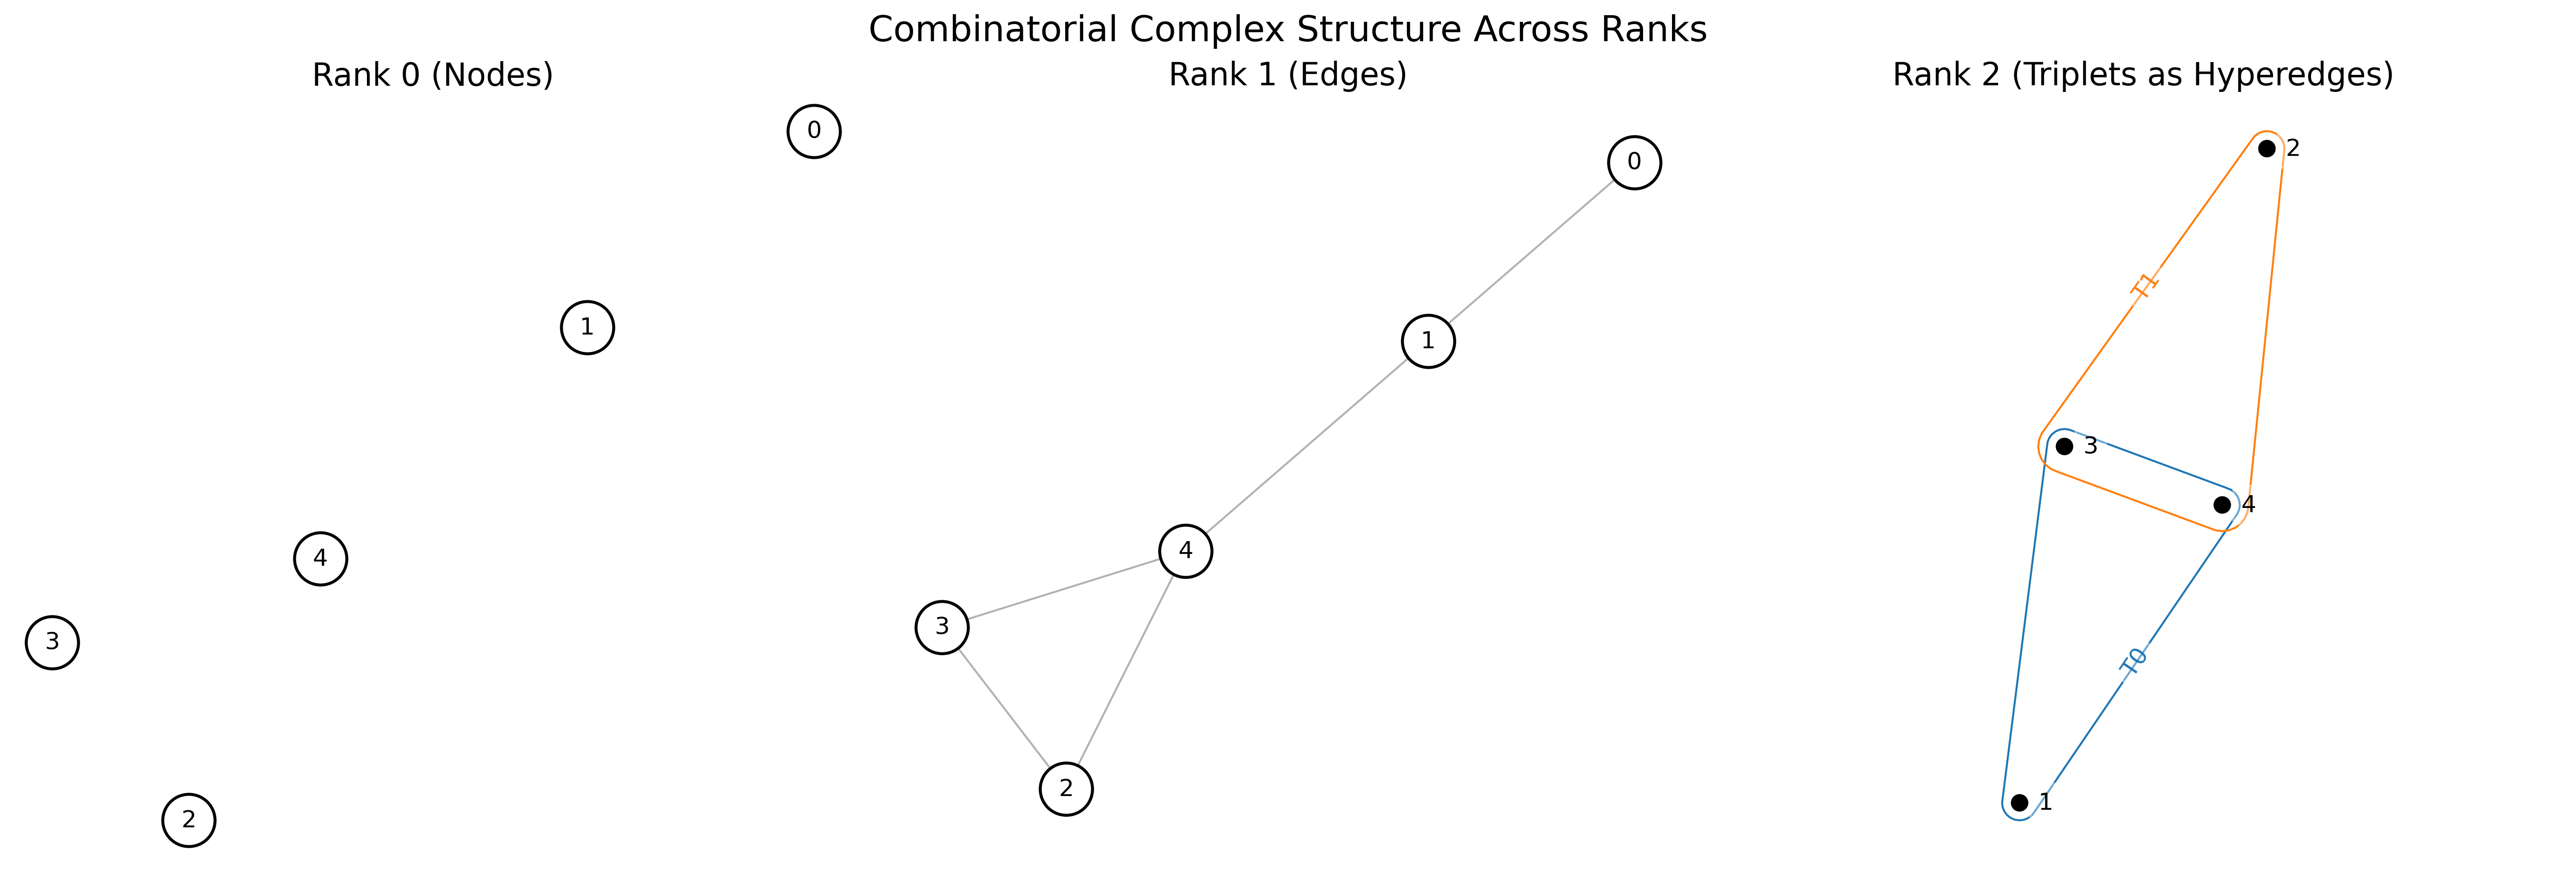

In [33]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import matplotlib as mpl

# --- Styling ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.usetex": False,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 300,
    "savefig.dpi": 300
})

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Graph Layout ---
G = nx.Graph()
G.add_nodes_from(rank_0)
G.add_edges_from(rank_1)
pos = nx.spring_layout(G, seed=42)

# --- Figure ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets as Hyperedges)"]

# Rank 0
nx.draw_networkx_nodes(G, pos, ax=axes[0], node_color="white", edgecolors="black", linewidths=1.5, node_size=700)
nx.draw_networkx_labels(G, pos, ax=axes[0], font_color="black", font_size=12)
axes[0].set_title(titles[0])
axes[0].axis("off")

# Rank 1
nx.draw_networkx_nodes(G, pos, ax=axes[1], node_color="white", edgecolors="black", linewidths=1.5, node_size=700)
nx.draw_networkx_edges(G, pos, ax=axes[1], edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(G, pos, ax=axes[1], font_color="black", font_size=12)
axes[1].set_title(titles[1])
axes[1].axis("off")

# Rank 2 (Hypergraph)
H_data = {f"T{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(H, with_node_labels=True, ax=axes[2])
axes[2].set_title(titles[2])
axes[2].axis("off")

# Supertitle
plt.suptitle("Combinatorial Complex Structure Across Ranks", fontsize=18)

# Optional: Save figure
# fig.savefig("cc_visualization_final.png", bbox_inches="tight")

plt.show()

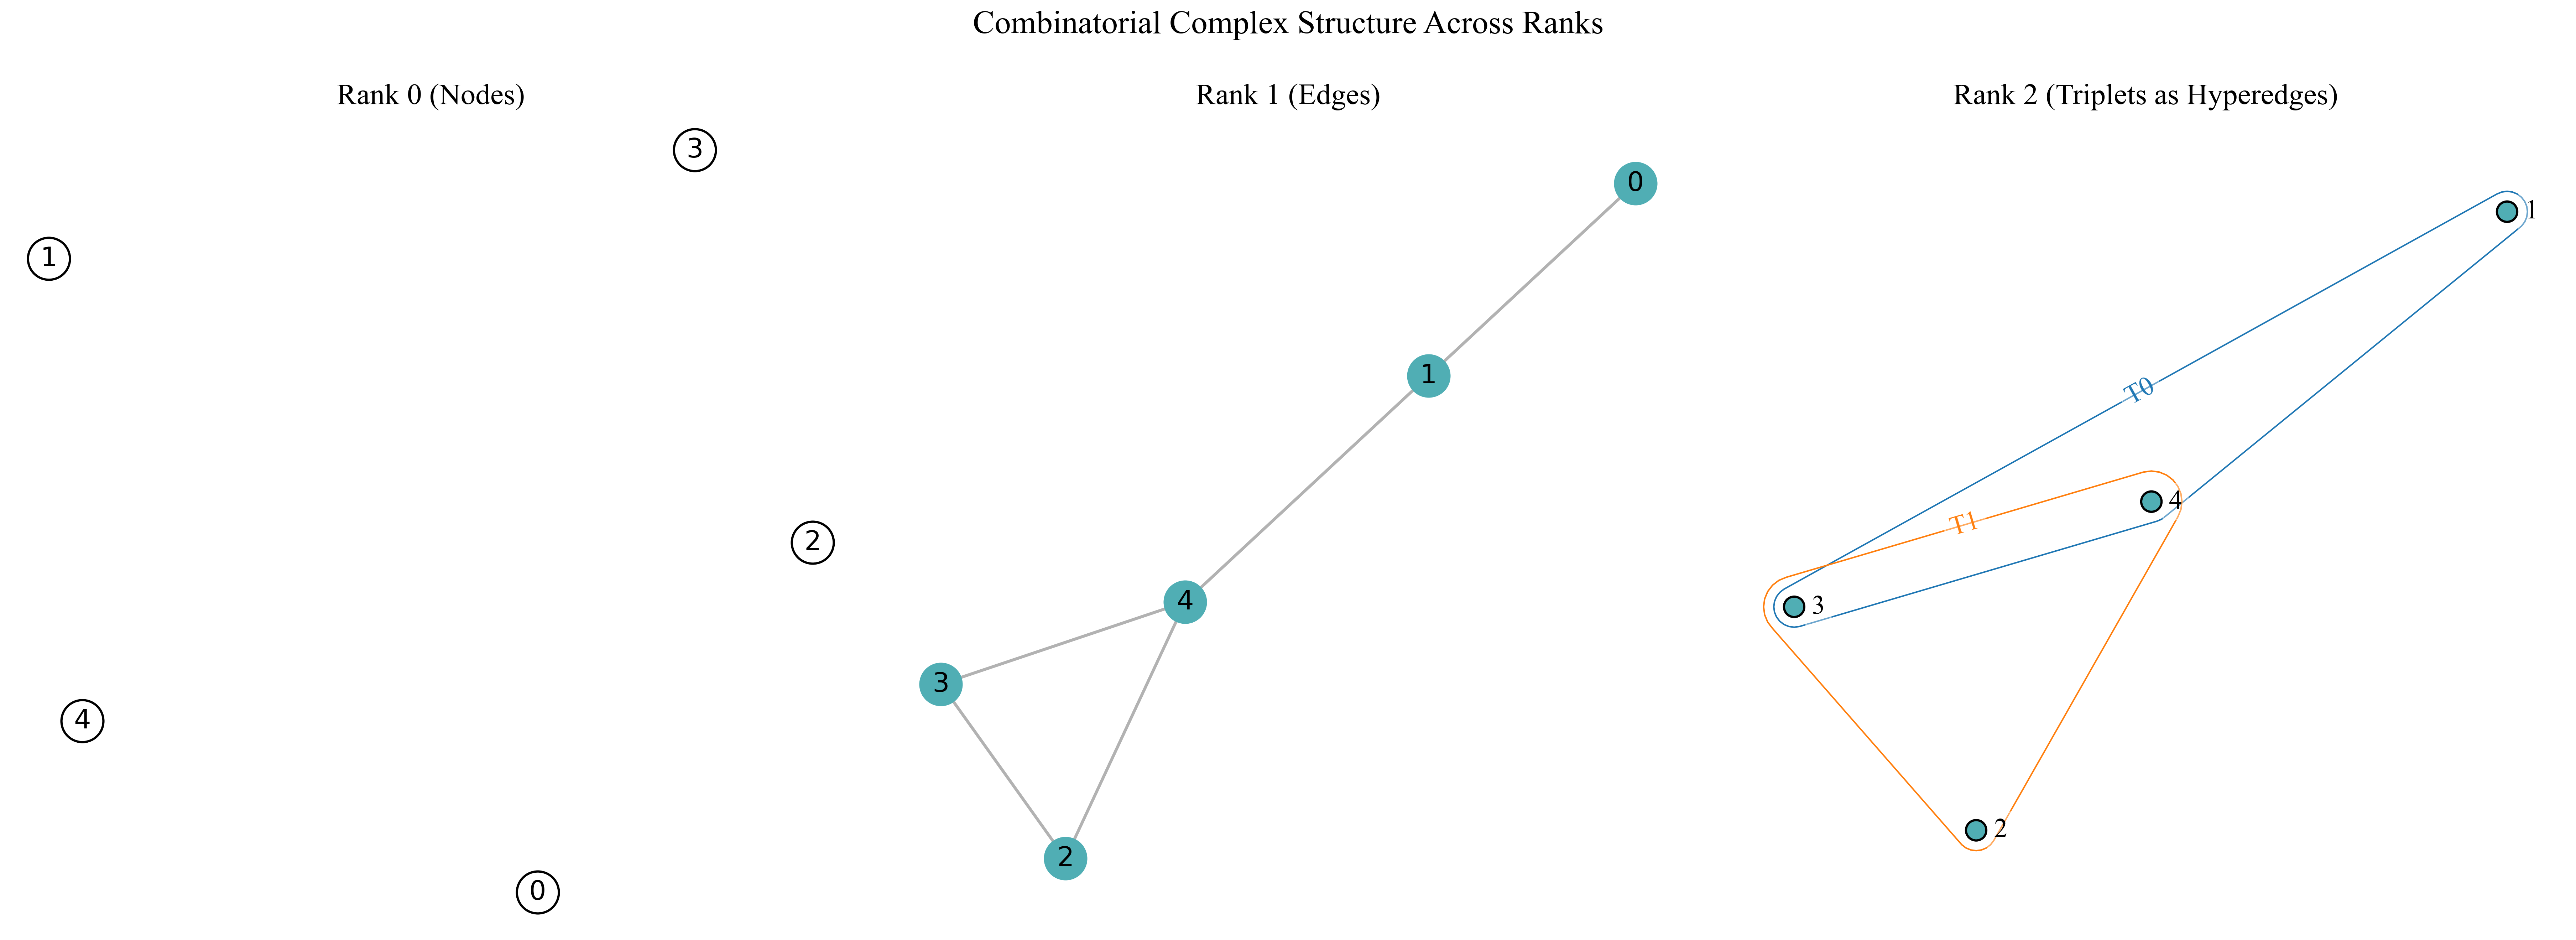

In [40]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import matplotlib as mpl

# --- Matplotlib Style ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "DejaVu Serif"],
    "font.size": 18,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "figure.titlesize": 22,
    "text.color": "black"
})

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Graph Layouts ---
# Layout for Rank 1 and Rank 2 (shared layout)
G_shared = nx.Graph()
G_shared.add_nodes_from(rank_0)
G_shared.add_edges_from(rank_1)
shared_pos = nx.spring_layout(G_shared, seed=42)

# Independent layout for Rank 0 (nodes only)
G_nodes = nx.Graph()
G_nodes.add_nodes_from(rank_0)
nodes_only_pos = nx.spring_layout(G_nodes, seed=123)

# --- Figure ---
fig, axes = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets as Hyperedges)"]

# --- Rank 0 Plot (custom layout, white nodes) ---
nx.draw_networkx_nodes(G_nodes, pos=nodes_only_pos, ax=axes[0],
                       node_color="white", edgecolors="black", linewidths=1.5, node_size=800)
nx.draw_networkx_labels(G_nodes, pos=nodes_only_pos, ax=axes[0],
                        font_color="black", font_size=18)
axes[0].set_title(titles[0])
axes[0].axis("off")

# --- Rank 1 Plot (shared layout) ---
nx.draw_networkx_nodes(G_shared, pos=shared_pos, ax=axes[1],
                       node_color="#50aeb4", node_size=800)
nx.draw_networkx_edges(G_shared, pos=shared_pos, ax=axes[1],
                       edge_color="gray", alpha=0.6, width=2)
nx.draw_networkx_labels(G_shared, pos=shared_pos, ax=axes[1],
                        font_color="black", font_size=18)
axes[1].set_title(titles[1])
axes[1].axis("off")

# --- Rank 2 Plot (Hypergraph using shared layout) ---
H_data = {f"T{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(
    H,
    ax=axes[2],
    pos=shared_pos,  # same layout as Rank 1
    with_node_labels=True,
    node_labels_kwargs={"fontsize": 18},
    nodes_kwargs={"facecolor": "#50aeb4", "edgecolor": "black", "linewidth": 1.5}
)
axes[2].set_title(titles[2])
axes[2].axis("off")

# --- Final Touch ---
plt.suptitle("Combinatorial Complex Structure Across Ranks", y=1.08)
plt.show()

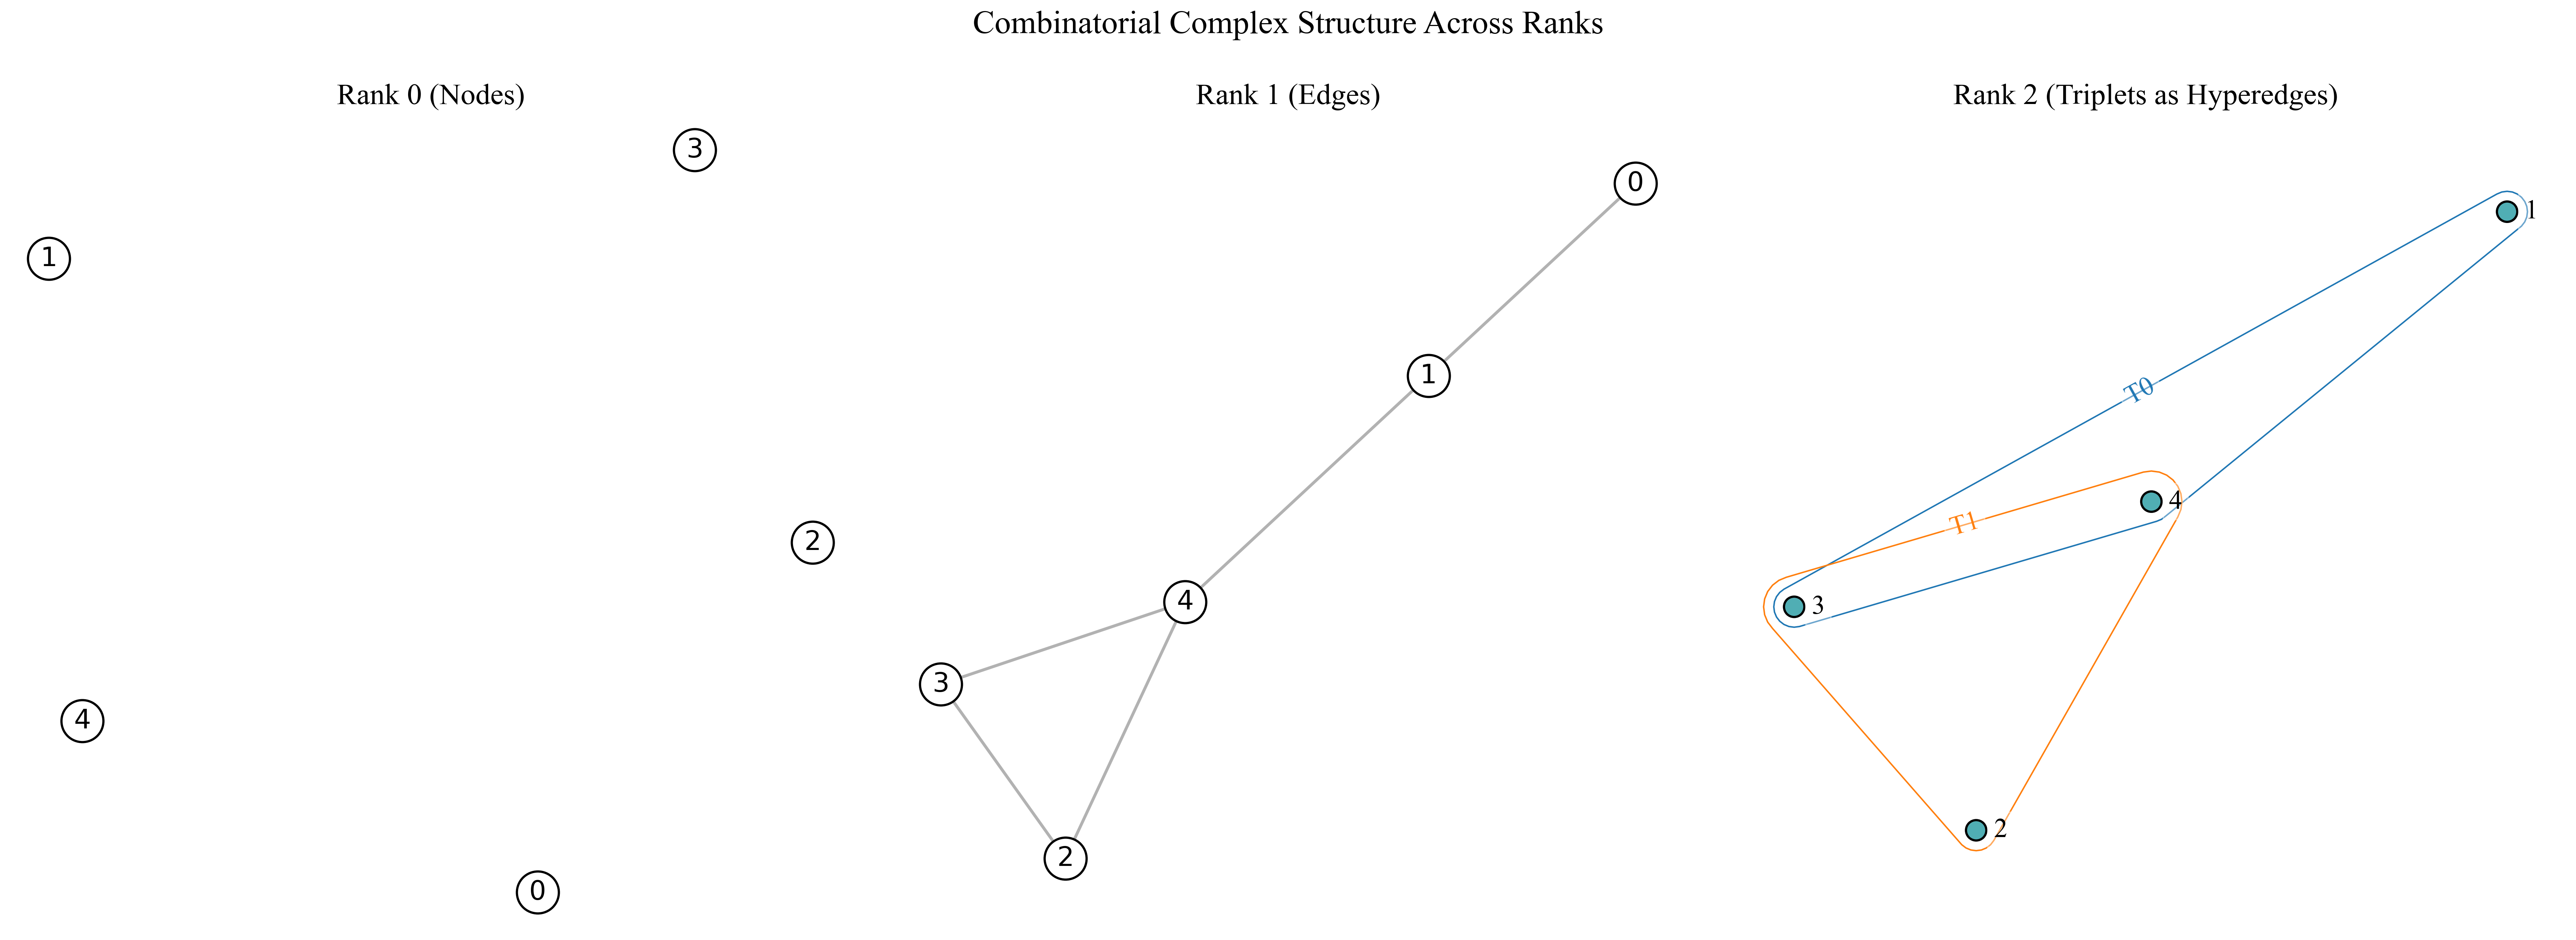

In [42]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import matplotlib as mpl

# --- Matplotlib Style ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "DejaVu Serif"],
    "font.size": 18,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "figure.titlesize": 22,
    "text.color": "black"
})

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

triplet_metrics = {
    tuple(map(int, k.strip("()").split(", "))): v
    for k, v in raw_metrics.items()
}

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Graph Layouts ---
# Layout for Rank 1 and Rank 2 (shared layout)
G_shared = nx.Graph()
G_shared.add_nodes_from(rank_0)
G_shared.add_edges_from(rank_1)
shared_pos = nx.spring_layout(G_shared, seed=42)

# Independent tighter layout for Rank 0
G_nodes = nx.Graph()
G_nodes.add_nodes_from(rank_0)
nodes_only_pos = nx.spring_layout(G_nodes, seed=123, k=0.3)  # smaller k = tighter layout

# --- Figure ---
fig, axes = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets as Hyperedges)"]

# --- Rank 0 Plot ---
nx.draw_networkx_nodes(G_nodes, pos=nodes_only_pos, ax=axes[0],
                       node_color="white", edgecolors="black", linewidths=1.5, node_size=800)
nx.draw_networkx_labels(G_nodes, pos=nodes_only_pos, ax=axes[0],
                        font_color="black", font_size=18)
axes[0].set_title(titles[0])
axes[0].axis("off")

# --- Rank 1 Plot (white nodes with black edges) ---
nx.draw_networkx_nodes(G_shared, pos=shared_pos, ax=axes[1],
                       node_color="white", edgecolors="black", linewidths=1.5, node_size=800)
nx.draw_networkx_edges(G_shared, pos=shared_pos, ax=axes[1],
                       edge_color="gray", alpha=0.6, width=2)
nx.draw_networkx_labels(G_shared, pos=shared_pos, ax=axes[1],
                        font_color="black", font_size=18)
axes[1].set_title(titles[1])
axes[1].axis("off")

# --- Rank 2 Plot (Hypergraph using shared layout) ---
H_data = {f"T{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(
    H,
    ax=axes[2],
    pos=shared_pos,  # same layout as Rank 1
    with_node_labels=True,
    node_labels_kwargs={"fontsize": 18},
    nodes_kwargs={"facecolor": "#50aeb4", "edgecolor": "black", "linewidth": 1.5}
)
axes[2].set_title(titles[2])
axes[2].axis("off")

# --- Final Touch ---
plt.suptitle("Combinatorial Complex Structure Across Ranks", y=1.08)
plt.show()

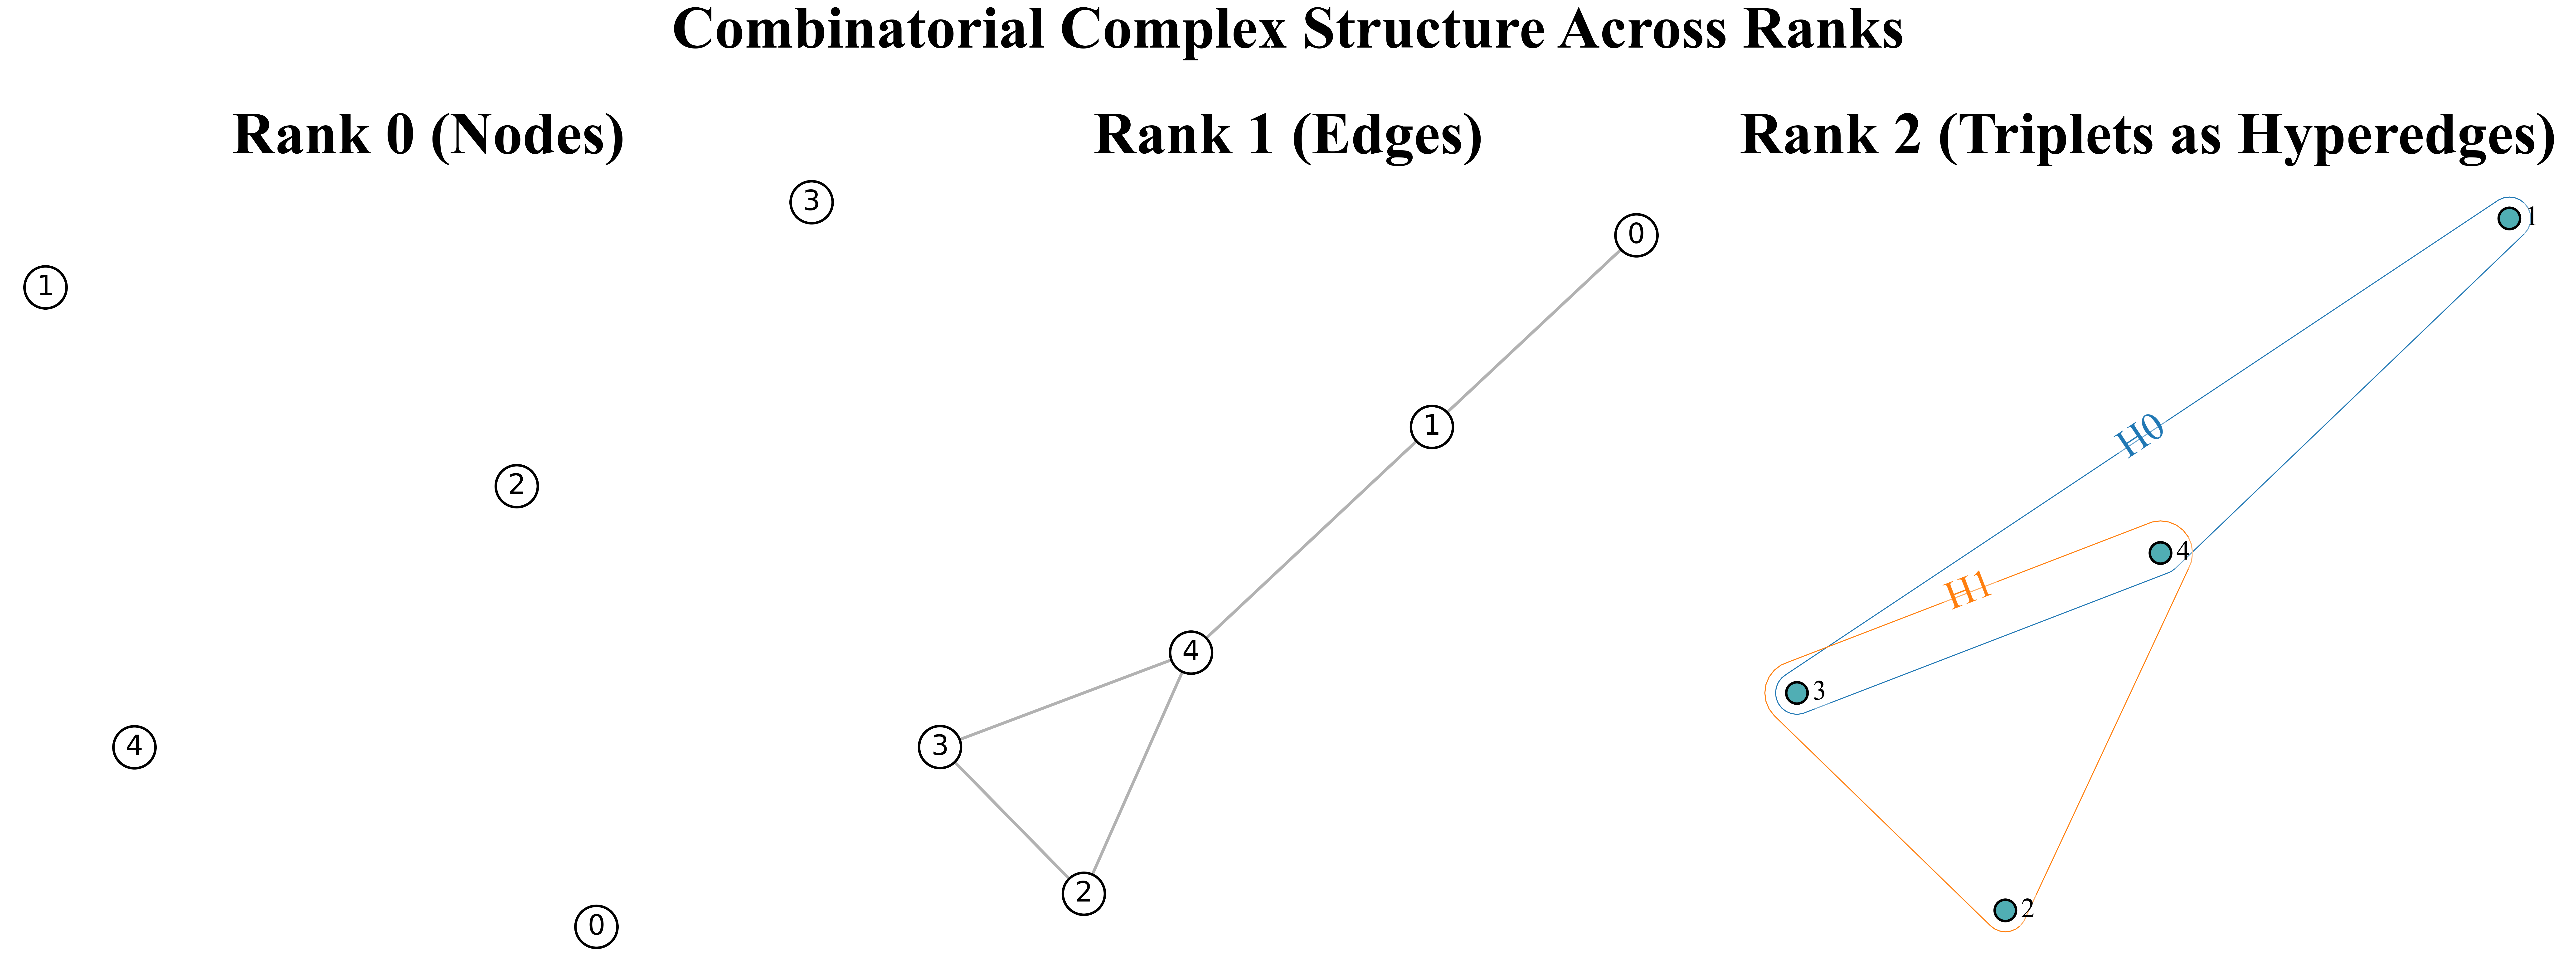

In [55]:
# --- Imports ---
import os
import json
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import matplotlib as mpl
import numpy as np

# --- Matplotlib Style ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern", "Times New Roman", "DejaVu Serif"],
    "font.size": 40,
    "axes.titlesize": 60,
    "axes.labelsize": 60,
    "xtick.labelsize": 60,
    "ytick.labelsize": 60,
    "legend.fontsize": 60,
    "figure.titlesize": 60,
    "text.color": "black"
})

# --- Paths ---
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
subject_idx = 0
metrics_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_triplets.json")
cc_path = os.path.join(repo_root, "results", "metrics", f"subject_{subject_idx}_cc.json")

# --- Load Data ---
with open(cc_path, "r") as f:
    cc_data = json.load(f)

with open(metrics_path, "r") as f:
    raw_metrics = json.load(f)

# --- Extract Ranks ---
rank_0 = cc_data["nodes"]
rank_1 = [tuple(e) for e in cc_data["edges"]]
rank_2 = [tuple(t) for t in cc_data["triplets"]]

# --- Layouts ---
G_shared = nx.Graph()
G_shared.add_nodes_from(rank_0)
G_shared.add_edges_from(rank_1)
shared_pos = nx.spring_layout(G_shared, seed=42, k=0.4)

G_nodes = nx.Graph()
G_nodes.add_nodes_from(rank_0)
nodes_only_pos = nx.spring_layout(G_nodes, seed=123, k=0.08)  # tighter, more centered

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(36, 12), constrained_layout=True)
fig.patch.set_facecolor("white")
titles = ["Rank 0 (Nodes)", "Rank 1 (Edges)", "Rank 2 (Triplets as Hyperedges)"]

# --- Rank 0 (tighter node layout, no labels) ---
nx.draw_networkx_nodes(G_nodes, pos=nodes_only_pos, ax=axes[0],
                       node_color="white", edgecolors="black", linewidths=2.5, node_size=1800)
nx.draw_networkx_labels(G_nodes, pos=nodes_only_pos, ax=axes[0],
                        font_color="black", font_size=28)
axes[0].set_title(titles[0], fontweight='bold')
axes[0].axis("off")

# --- Rank 1 (same layout as Rank 2, white nodes) ---
nx.draw_networkx_nodes(G_shared, pos=shared_pos, ax=axes[1],
                       node_color="white", edgecolors="black", linewidths=2.5, node_size=1800)
nx.draw_networkx_edges(G_shared, pos=shared_pos, ax=axes[1],
                       edge_color="gray", alpha=0.6, width=3)
nx.draw_networkx_labels(G_shared, pos=shared_pos, ax=axes[1],
                        font_color="black", font_size=28)
axes[1].set_title(titles[1], fontweight='bold')
axes[1].axis("off")

# --- Rank 2 (hypergraph) ---
H_data = {f"H{i}": set(t) for i, t in enumerate(rank_2)}
H = hnx.Hypergraph(H_data)
hnx.drawing.draw(
    H,
    ax=axes[2],
    pos=shared_pos,
    with_node_labels=True,
    node_labels_kwargs={"fontsize": 28},
    nodes_kwargs={"facecolor": "#50aeb4", "edgecolor": "black", "linewidth": 2.5}
)
axes[2].set_title(titles[2], fontweight='bold')
axes[2].axis("off")

# --- Title ---
fig.suptitle("Combinatorial Complex Structure Across Ranks", y=1.12, fontweight='bold')
plt.show()